In [27]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv('covid19_tweets.csv')

In [29]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82710 entries, 0 to 82709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         82710 non-null  object
 1   user_location     65995 non-null  object
 2   user_description  78005 non-null  object
 3   user_created      82710 non-null  object
 4   user_followers    82710 non-null  int64 
 5   user_friends      82710 non-null  int64 
 6   user_favourites   82710 non-null  int64 
 7   user_verified     82710 non-null  bool  
 8   date              82710 non-null  object
 9   text              82710 non-null  object
 10  hashtags          58903 non-null  object
 11  source            82693 non-null  object
 12  is_retweet        82710 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 7.1+ MB


In [31]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45892 entries, 2 to 82709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         45892 non-null  object
 1   user_location     45892 non-null  object
 2   user_description  45892 non-null  object
 3   user_created      45892 non-null  object
 4   user_followers    45892 non-null  int64 
 5   user_friends      45892 non-null  int64 
 6   user_favourites   45892 non-null  int64 
 7   user_verified     45892 non-null  bool  
 8   date              45892 non-null  object
 9   text              45892 non-null  object
 10  hashtags          45892 non-null  object
 11  source            45892 non-null  object
 12  is_retweet        45892 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 4.3+ MB


In [33]:
df.describe()

,user_followers,user_friends,user_favourites
count,4.589200e+04,45892.000000,4.589200e+04
mean,1.492851e+05,2428.201538,1.574563e+04
std,9.970227e+05,10405.007164,4.593120e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,3.150000e+02,221.000000,3.400000e+02
50%,1.491000e+03,688.000000,2.285500e+03
75%,7.522500e+03,1962.000000,1.085550e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [34]:
df = df.dropna()

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\argha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import io  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
  
# word_tokenize accepts 
# a string as an input, not a file.  
stop_words = set(stopwords.words('english')) 

In [37]:
df["text"] = df["text"].str.lower().str.split()

In [38]:
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [39]:
for i in df['text']:
    print(i)

['@diane3443', '@wdunlap', '@realdonaldtrump', 'trump', 'never', 'claimed', '#covid19', 'hoax.', 'claim', 'effort', 'to…', 'https://t.co/jkk8vhwhb3']
['@brookbanktv', 'one', 'gift', '#covid19', 'give', 'appreciation', 'simple', 'things', 'always', 'around', 'me…', 'https://t.co/z0poalfxcw']
['25', 'july', ':', 'media', 'bulletin', 'novel', '#coronavirusupdates', '#covid19', '@kansalrohit69', '@drsyedsehrish', '@airnewsalerts', '@ani…', 'https://t.co/mn0eecsjhh']
['#coronavirus', '#covid19', 'deaths', 'continue', 'rise.', 'almost', 'bad', 'ever', 'was.', 'politicians', 'businesses', 'want…', 'https://t.co/hxmhooxx2c']
['#covid19', 'change', 'work', 'general', '(and', 'recruiting,', 'specifically)', 'via/', '@proactivetalent', '#recruiting…', 'https://t.co/bjzxzgpmbk']
['pope', 'god', '-', 'prophet', 'sadhu', 'sundar', 'selvaraj.', 'watch', 'https://t.co/7x5rtykvji', '#hurricanehanna', '#covid19…', 'https://t.co/06dzcgunwl']
['order', 'here:', 'https://t.co/4nurgx6ema', '#logo', '#graphi

['#covid19', 'disrupted', 'medically', 'necessary', 'health', 'interventions', 'like', '#cleft', 'surgeries,', 'basic…', 'https://t.co/kcemwmqdgt']
['meanwhile,', 'everyone', 'else', 'trying', 'work', 'together', 'beat', '#covid19,', "trump's", 'america', 'busy', 'creating', 'mo…', 'https://t.co/hnji964oel']
['check', "'a", 'soul', "proposal'", '@majosanteli', 'spiritual', 'boost—reflections', '#covid19', 'transcend', 'material.']
['deep', 'immune', 'profiling', '#covid19', 'patients', 'reveals', 'distinct', 'immunotypes', 'therapeutic', 'implications:', 'https://t.co/1jfx5fltza']
['#abudhabi', 'health', 'services', '(seha)', 'starts', 'conducting', 'new', 'clinical', 'trials', 'phase', 'iii', 'inactivated', 'vaccine', 'to…', 'https://t.co/eadfp7wdxv']
['24-hour', 'trends', '@iapublichealth', '#covid19', 'data', 'statewide', '(0700,', 'july', '24', '-', '0700,', 'july', '25):', 'activity', 'rate:', '26.91%', '(+…', 'https://t.co/1cgmptjuju']
['latest', 'numbers', 'covid-19', 'canada', 

['day', '136', 'reported', 'cases', '#covid19', '15.759', 'million', 'record', 'high', 'july', '23', '-', '282.7k', '9', 'day', 'rolling', 'average', '241.75…', 'https://t.co/rlhpi6zjik']
['microscopic', 'virus', 'called', '#covid19', 'put', 'world', 'it’s', 'knees,', 'challenging', 'human', 'capacity', '&amp;', 'it’s', 'social', 'fabri…', 'https://t.co/symahiuui6']
['3)', "i'm", 'hoping', 'distract', 'massive', 'medical', 'failures', 'comes', '#covid19', 'vote', 'for…', 'https://t.co/rw2jsiy4ur']
['#westbengal,', '#india,', '35', 'new', '#covid19', 'deaths', 'reported', 'last', '24', 'hours.', 'info', 'via', 'ministry', 'health', 'family', 'welfare,', '#goi']
['@drdavidsamadi', 'racist', 'fuck!', '#covid19']
['@climatehuman', '@stopflying', 'attitude', 'civilization,', 'right', '#facetheclimateemergency', '#covid19', 'wit…', 'https://t.co/9abmogooms']
['#hyderabad', 'need', '#blood', 'type', ':', 'b-positive', ':', 'apollo', 'hyderguda', 'blood', 'component', ':', 'need', 'plasma', 'b

['#covid19', 'clusters', 'occurred', '#pachinko', 'parlors?', '@japantoday', 'https://t.co/nccn9ydhls', 'https://t.co/lbhevixjur']
['celebrating', 'brother', 'big', 'day.', 'drive-thru', 'high', 'school', 'graduation', 'time', '#covid19,', 'friends', '&amp;…', 'https://t.co/zcyiqu10am']
['#secunderabad', 'need', '#blood', 'type', ':', 'b-positive', ':', 'yashoda', 'hospital', 'panty', 'blood', 'component', ':', 'need', 'plasma', 'b+ve…', 'https://t.co/jgeqzgrnva']
['#undpinpakistan,', 'along', '@unfpapakistan', '&amp;', '@unicef_pakistan', 'held', 'adolescent', '&amp;', 'youth', 'perception', 'survey', 'regardin…', 'https://t.co/fjexxh3d0l']
['#uganda', 'country', 'world', 'promises', 'masks', 'delivers', 'knickers😒😒😒', 'protect', 'citizens', 'd…', 'https://t.co/tlyhlptwb7']
['(5/5)', 'thankful', 'everyone', 'believing', 'supporting', 'social', 'welfare', 'efforts.', '🏻', '🏻', '🏻#covid19', '#covisat…', 'https://t.co/ff3r89vbfi']
['🌍🌎🌏🇨🇭while', '#covid19', 'affects', 'large', 'number', 

['help', 'slow', 'spread', '#covid19', 'identify', 'risk', 'cases', 'sooner', 'self-reporting', 'symptoms', 'daily,', 'even', 'y…', 'https://t.co/czcq6tqbvl']
['@pfizer,', '@biontech_group', 'win', '$1.95b', '“warp', 'speed”', 'order', '#covid19', '#vaccine', 'https://t.co/rxltuywau0', 'via', '@genbio']
['hello', '#ispr', 'trollers', 'feigning', '#bangladeshi', '.', 'self', 'respecting', 'people.', 'forg…', 'https://t.co/qnugiqqezk']
['@juniordrblog', '@femi_sorry', 'many', 'concerns', 'photo,', 'including', '#mask?', '@dominicraab', 'think', 'the…', 'https://t.co/fjyu6jbblx']
['presidential', 'communications', 'operations', 'office', 'reported', 'total', '13', '#covid19', 'cases', '2:50', 'p.m.,', 'sec.', 'marti…', 'https://t.co/qkaqyz9jiy']
['immediately', 'take', 'shoes', 'get', 'home,', 'disinfect', '@cnni', '#covid19', 'https://t.co/tdjlfxchxx']
['madhya', 'pradesh:', 'priests', 'offer', 'prayers', '#nagchandreshwar', 'temple', 'occasion', "'#naag_panchami'.", 'priest', 'sa…', 'ht

['25th', 'july', 'update', 'odisha', 'reports', '1320', '#covid19', 'cases', '24', 'districts', 'odisha.', 'bargarh', 'reports', '14', 'case.', 'bargarh', 'to…', 'https://t.co/ffkbmskgiv']
['|', 'total', 'case', 'numbers', 'nearing', '80,000-mark,', 'philippines', 'reports', '2,019', 'new', '#covid19', 'cases,', '1,…', 'https://t.co/t9ke27rh2p']
['unproven', 'fascinating', 'link', '#covid19,', 'resulting', 'drop', '#airpollution,', '90%', 'drop', 'premat…', 'https://t.co/vgmlmqlcqa']
['#kerala,', '#india', 'reported', 'reduction', '87', 'active', '#covid19', 'cases', 'last', '24', 'hours.', 'currently', '9379', 'activ…', 'https://t.co/cidcgyvxe9']
['mass', 'graves', 'overseas', '#covid19', 'https://t.co/udo8iev5yh']
['#covid19:', 'india', 'begins', 'first', 'human', 'trials', 'potential', 'drug', 'https://t.co/n7eavyzzmm']
['economic', 'recovery', 'post-#covid19', 'quick:', '#rbi', 'https://t.co/jxrm9mh7su']
['official', '#covid19', 'update', '#thailand', 'saturday:', '3,282', 'people'

['updates', '#covid19', 'updates', 'information', 'helpful', 'following', 'guidelines', 'mountains', 'monterey', 'bay', 'cali…', 'https://t.co/sbkqirvwad']
['full', 'affects', '#covid19', 'yet', 'seen!', 'help', 'businesses', 'seeking', 'next', 's…', 'https://t.co/sl9nyne33w']
['cm', 'uddhav', 'thackeray', 'says', 'favour', 'complete', 'lifting', '#lockdown', 'maharashtra,', 'says', 'needs', 'b…', 'https://t.co/puvzxbp0cv']
['knowledge', 'power', '🧠', '✊', 'keep', 'yourself,', 'family', 'community', 'safe', 'learning', 'symptoms', '#covid19.', '📖…', 'https://t.co/xddgclkckd']
['study', 'shows', '#covid19', 'aerosolized', 'form', 'hardier', 'sars-1', 'mers', 'viable', '16', 'hours.', 'https://t.co/bqcbpwqpj1']
['#big_breaking', '1', 'covid', 'death', '#jharsuguda.', 'details', '10', 'new', '#covid19', 'deaths', '#odisha', 'total', 'deaths', ':130', 'https://t.co/mwfptj2xb8']
['researchers', 'identify', '21', 'existing', '#drugs', 'could', 'treat', '#covid19', 'https://t.co/xgb74dfvfe', 

['@415holgate', '@nehorseman', '#sinclairbroadcasting', 'going', 'run', 'hit', 'piece', 'blaming', '#drfauci', 'creating…', 'https://t.co/ya7tulyrsr']
['#hongkong', 'reported', '123', 'new', 'confirmed', '#covid19', 'cases', 'july', '25,', 'bringing', 'total', 'number', 'infections', 'city…', 'https://t.co/5rg4deucay']
['#assam,', '#india,', '1130', 'new', '#covid19', 'confirmed', 'cases', 'reported', 'last', '24', 'hours.', 'info.', 'provider:', '#mohfw']
['nearly', 'third', '#americans', 'believe', '#covid19', '#deathtoll', '#conspiracytheory', 'via', '@forbes', 'https://t.co/x6m6dhyjfp']
['scammers', 'posing', 'covid-19', 'case', 'contact', 'tracers', '|', '#coronavirus', '|', '#scams', '|', '#covid19', 'https://t.co/8tcnjgnozk']
['bloody', '#covid19,', 'obviously', 'enough', 'excitement', 'much', 'available', 'time,', 'not...', 'https://t.co/ebkrnlud9c']
['@australian', 'incompetent', 'governor', 'new', 'york', '@nygovcuomo', 'ordered', 'nursing', 'homes', 'take', '#covid19', 'posi

['@startelegram', '@replicantx6', '@johncornyn', 'still', 'safe', 'house', 'drinking', 'coronas', '?', '#covid19', '#covidtexas']
['carrier,', 'started', 'mild', 'muscle', 'pain', '&amp;', 'tested', '+ve.', 'older', 'family', 'member', 'tested', '#covid19', '+ve.', 'imp', 'h…', 'https://t.co/hn5xn6q3wi']
['#coronainfoch', '#covid19', '#corona', '#ireland', 'covid-19', 'app', 'successful', 'irela...', 'https://t.co/qehd8qew9x']
['@tomthunkitsmind', '#gdp', 'measure', '#humanwellbeing', 'https://t.co/tlb0gw7mtq', '#covid19', 'https://t.co/xay1ewjlis', 'd…', 'https://t.co/4bwku29bgi']
['#indiafightscorona:', '#covid19', 'india', 'update:', '▪️total', 'cases', '-', '1,336,861', '▪️active', 'cases', '-', '456,071', '▪️cured/discharged…', 'https://t.co/pgs9omdqaj']
['#michigan', '#covid19', 'hospitalization', 'data', '24', 'july', '2020:', 'inpatient:', '481', '(+29', 'since', '17', 'july)', 'critical', 'care:', '197', '(-…', 'https://t.co/dzcdwdcw0k']
['neighbors', 'behind', 'party.', 'tell

['true', 'story', '#covid19', '#wearamask', 'https://t.co/fwwomshzhg']
['current', '#nba2k20', '#myteam', 'added', 'two', 'favourites', 'kid', '99', 'starbury', '99', 'maggette', 'td', 'stay', 'tuned', 'game', 'pla…', 'https://t.co/ofcszw3qbp']
['#sandiego', 'county', 'daily', '#covid19', 'hospitalizations', 'rates', 'higher', 'peak', 'mid-april.', 'addition,', 't…', 'https://t.co/1ifknh0hx0']
['dr.', 'davidbagus', 'appeared', '@cbsnews', 'address', 'recent', '#handsanitizer', 'recall', 'investigation', 'fda', 'concerni…', 'https://t.co/pqasosk1nw']
['#covid19', '#trumpviruscatastrophe', 'make', 'republican', 'party', 'pay', 'november.', '#votebluetosaveamerica2020', 'https://t.co/sut5hyartt']
['mealtime', 'revolution', 'iso', 'impulse', 'buy?', '🤔', 'either', 'way,', 'i’m', 'eat', 'pies.', '#pies', '#onlineshop', '#covid19…', 'https://t.co/8c77mk6oma']
['history', 'hope', 'repeating', '#history', '#covid19', '#boomerbabeslife', '#womenover50', '#weekendwisdom', 'https://t.co/vsvoaab6v

['#covid19,', 'want', 'trust', '@cdcgov.', '@cdcdirector', '#robertredfield,', 'organization', 'be…', 'https://t.co/gngxege0r3']
['arizona', 'figured', 'stop', 'rising', '#covid19', 'cases', 'without', 'full', 'lockdown.', 'how?', 'mandate', 'masks', 'close', 'bars,…', 'https://t.co/fpkwcwmdp3']
['remember', '@govmurphy', 'sent', '#covid19', '#coronavirus', 'patients', 'nursing', 'homes', 'killed', '7,000', 'seniors', 'seeded', 'en…', 'https://t.co/sv5wqd1tcq']
['\u2066congratulations', 'dr.', 'mitchell', 'fox', '(in', 'middle),', '#covid19', 'stop', 'great', '#meded', 'pgy-4', 'rotation', '\u2066@nygh_news\u2069…', 'https://t.co/1yozyaipkb']
['ends', 'sunday!', 'open', 'till', '12a', 'tonight!', '.', '.', '.', '#jaxbeach', '#904happyhour', '#igersjax', '#jaxbeaches', '#904food', '#jax…', 'https://t.co/dycn7b56vd']
['bill', 'gates', 'demonstrates', '"dupers', 'delight"', 'throughout', 'interview.', '#covid19', '#coronavirus', '#vaccine', '#coronavaccine', 'https://t.co/qnlbycwbsa']
['m

['lemming', 'syndrome', '#covid19', 'https://t.co/1asjgewooe']
['july', '24', 'update', '@tompkinshealth', '#covid19', 'cases.', '#twithaca', 'https://t.co/repuwsegzp']
['coronavirus', 'prevention', 'worse', 'disease', 'https://t.co/okquuggux8', '#covid19']
['latest', 'health', 'news', 'direct!', 'https://t.co/vjsyidaman', 'thanks', '@ezechinwe', '@bonnieallencbc', '@salem_statesman', '#covid19', '#healthcare']
['#pbec', 'member', '@topglovecorp', 'surpassed', 'public', 'bank', '@bursamalaysiakl', 'rank', '2nd', 'largest', 'company', 'market…', 'https://t.co/kf4uxpzh9b']
["@realdonaldtrump's", 'watch,', '148,477', 'americans', 'died', '#covid19', '(23.1%', 'deaths', 'worldwide).', 'abo…', 'https://t.co/swsesc8rxj']
['last', 'updated:', '2020-07-25', '00:05:01+00:00gmt', 'coronavirus', '[covid-19]', 'cases:', '15929885', 'deaths:', '641841', '#corona…', 'https://t.co/eqte1gwjs6']
['#uk', '#fintech', '#revolut', 'raises', '$80m', 'despite', '#pandemic', 'fallout', 'https://t.co/jwyuog7j3

['👇👇👇#covid19', 'gone', 'away', '#staysafe', '#nursessavelives', 'https://t.co/bptnqiyt8i']
['thoughts?', '#ppe', '#facemasks', '#faceshield', '#protection', '#coronavirus', '#covid19', '#covid', 'https://t.co/laa4vjvoyy']
['1,593', '#covid19', 'positive', 'cases,', '998', 'patients', 'recovered', '8', 'deaths', 'reported', 'telangana', 'today.', 'total', 'number', 'of…', 'https://t.co/gdhcmtb7rf']
['@benavides_marta', '#paoa', 'terrible', 'things', 'resulting', '#covid19', 'pandemic', 'become', 'pandemonium,one', 'not…', 'https://t.co/wprex6uyz1']
['@govkemp', '*not*', 'protecting', 'state', '#covid19', 'pandemic', '&amp;', '#daysofthedead', 'care', 'much', 'ei…', 'https://t.co/jhim9osaaf']
['tony', 'blair', 'told', '@ridgeonsunday', 'uk', 'going', 'living', '#covid19,', 'eliminating', 'it,', 'foreseea…', 'https://t.co/ic4icocgud']
['#himachalpradesh', 'reports', '21', 'new', '#covid19', 'cases', 'today,', 'taking', 'total', 'number', 'cases', '2,072', 'including', '869', 'activ…', 'h

['app', 'works', 'helps', 'keep', 'uk', 'safe!', 'help', 'slow', 'spread', '#covid19', 'identify', 'risk', 'cases', 'sooner…', 'https://t.co/ucvi4t9ptl']
['welcome', 'church!', 'may', 'look', 'like', 'it,', 'know', 'god', 'never', 'stops', 'working!', '#gracepoint', '#wemerry', 'amid', '#covid19']
['#coronavirusupdates:', '74-year-old', 'retired', 'govt', 'school', 'headmaster', 'brought', 'stnm', 'hospital', 'last', 'night', 'ro…', 'https://t.co/tbiznrkrnq']
['recite', 'hanuman', 'chalisa', '5', 'times', 'day', 'eradicate', '#covid19.', '5', 'times', 'concept', 'copied', 'religion', '😂', '#hanumanchalisa']
['@premierinn', 'interrogated', 'turned', 'away', '#keyworkers', '#covid19', 'pandemic.', 'imposed', '‘policy’', 'not…', 'https://t.co/t5w2hvwknz']
['#britain', '#covid19', 'ain’t', 'yet.', '#wearamask', 'https://t.co/jqq7hqdibg']
['@migga', '@covid_australia', 'that’s', 'smallest', 'daily', 'increase', 'investigation', 'count', 'fair', 'while.', 'bad', 'news.', '#covid19']
['#afgha

['details', '10', 'new', '#covid19', 'deaths', '#odisha:', '1.', '63-year', 'old', 'male', 'gajapati', 'district', 'also', 'suffering', 'from…', 'https://t.co/eefg7e3epn']
['osaka', 'emerging', 'new', '🔥', '#covid19', '🔥spot', 'https://t.co/scygrrpjje']
['stay', 'home', 'sick,', 'come', 'thick', '#covid19']
['jerusalema', 'reaches', '50', 'million', 'youtube', 'views!', 'congrats', '@masterkgsa', '#jerusalema50million', '#covid', '#covid19…', 'https://t.co/1dfwvuiyrc']
['odisha', 'detects', '1,376', 'new', '#covid19', 'positive', 'cases,', 'taking', 'total', 'number', 'cases', '25,389', 'including', '15,928', 'recov…', 'https://t.co/cluvxylfza']
['we’re', 'going', 'hit', '150,000', 'dead', 'americans', '#covid19', 'tomorrow.', '@realdonaldtrump’s', 'fault', 'inform…', 'https://t.co/vsoft7vvsa']
['congress', 'needs', 'stand', 'families', '#covid19.', 'text', '"savecc"', '747464', 'senator', 'tell', 'to…', 'https://t.co/mpzedf28t4']
['welp.', 'found', 'didn’t', '#covid19', '12', 'days', 

['debacle', '!!', '#victoria', '#melbourne', '#covid19vic', '#covid19', 'https://t.co/0elvzdfmwu']
['north', 'korea', 'declares', 'emergency', 'border', 'town', 'first', 'suspected', 'covid-19', 'case', 'reported', '#northkorea', '#covid19…', 'https://t.co/zuuilbtckt']
['🔥', 'accurate', '#temperature', '#measurement', '&amp;', '#alarm', 'early', '#detection', '#coronavirus', '#covid19,', 'watch', 'video…', 'https://t.co/td4xzwbxva']
['#mumbai', '#covid19', 'report', 'glance', 'wardwise', 'no.', 'positive,', 'active,death,', 'recovered', 'patients', 'wardwise', 'no.', 'sea…', 'https://t.co/fxd1thmls9']
['#oxfordvaccine', 'works', 'preliminary', 'data', 'phase', 'i/ii', 'trial', '#covid19', 'vaccine', 'developed', 'o…', 'https://t.co/su1wxfmdbk']
['one', 'thing', '#covid19', 'saw', 'riding', 'came', 'alone', 'free', 'ride', '#ongod']
['@govabbott', 'believe', 'you.', '#worthless', '#covid19', 'https://t.co/gbd0shwhp4']
['race', 'anyone', 'wins', 'winning.', 'pay', 'attention,', '#newyork

['new', 'study', '#covid19,', 'based', 'data', 'symptom', 'tracker', 'app,', 'determined', 'six', 'distinct', '"types"', 'o…', 'https://t.co/mhxxyeyivy']
["there's", 'misinformation', 'says', '#covid19', 'run', 'course', 'gone', '4', 'weeks.', 'bullshit.']
['stay', 'safe', '🙏🏻', '#kalravngo', '#healthcare', '#covid19', 'https://t.co/5z7jjofdds']
['kiss', 'ass', '#coronavirus', '#covid19']
['#linkedin', 'supporting', '#covid19', '#unemployment', 'https://t.co/qeslruauwn', 'https://t.co/gtpaovgbu7']
['bullshit', 'talked', '#china', 'masked', 'works', 'fighting', '#covid19', 'outline', 'since', 'ja…', 'https://t.co/mmzhfuzl15']
['#souravganguly', 'tested', 'negative', '#covid19.', 'quarantine', 'following', 'brother', 'tested', 'positive.']
['great', 'move', '@informatica', 'many', 'private', 'companies', 'follow.', '#karnatakafightscorona', '#covid19', '#informatica', 'https://t.co/d8xoaocdkf']
['congratulate', 'srirama', 'chandra', 'bhanja', 'medical', 'college', 'hospital', 'completing

['mobile', 'phone', 'security', 'https://t.co/esucglspbb', '#browser', '#hacking', '#security', '#lan', '#tool', '#attack', '#malware', '#youtube…', 'https://t.co/tpwjyb6e4w']
['3rd', 'phase', 'lifting', 'covid', 'restrictions', 'starts', 'tuesday,', 'july', '28.', '#qatar', '#qatarupdates', '#covid19', '#qatarnews', 'https://t.co/jhvcuxjmzi']
["bbc's", 'ian', 'wafula', 'tests', 'positive', 'coronavirus,', 'goes', 'isolation․', 'https://t.co/ngnhrszzmo', '#covid19', '#mondaymotivation']
['syntony', 'waving', 'world', 'new', 'living', 'systems', 'nieuwe', 'avonturen', '#covid19', '\u2066@robinsharma\u2069', '\u2066@alex8er\u2069…', 'https://t.co/ltygfkxvpw']
['"the', '#covid19-induced', 'shift', 'toward', '#digital', 'tools', 'interaction', 'channels', 'helped', 'dispel', 'four', 'key', 'myths', 'b…', 'https://t.co/rabmgtmrri']
['muse', 'developed', 'wearable', 'wrist', 'tracker', 'detect', '#covid19', 'symptoms', 'early', 'stage,', 'available…', 'https://t.co/tmkchdjnxh']
['i’m', 'amaz

['#globally', '#total', '#covid19', '#deaths', '#population', '#exceed', '6,58,586+/#sixlakhs,#fiftyeightthousand#fivehundred', '#and', 'eigh…', 'https://t.co/mopekwaxs4']
['health', 'ministry', 'decides', 'including', 'itolizumab', 'clinical', 'management', 'protocols', 'covid-19', '#healthministry…', 'https://t.co/jfma74ba4u']
['#coronavirusupdates:', '#covid19', 'india', 'tracker', '(as', '27', 'july,', '2020,', '08:00', 'am)', '▶️', 'confirmed', 'cases:', '1,435,453', '▶️', 'act…', 'https://t.co/enxxxn5lxf']
['#covid19', '|', '34', 'new', 'positive', 'cases', 'reported', '#koraput', 'district,', '24', 'local', 'contacts', 'male:', '22', 'female:', '12', 'https://t.co/s4iey8kitr']
['good', 'morning', 'tweethearts.', 'blessed', 'day', 'you.', 'stay', 'safe', 'take', 'care.', '#covid19', '#southafrica']
['#5ways', 'prioritise', "team's", 'well-being', '#covid19', 'https://t.co/fzbeyzz56k', 'via', '@biz_marketing', 'https://t.co/fwfeygxt2w']
['wearing', '#facemask,', 'whether', 'mandat

['pharmacies', 'along', 'victoria/nsw', 'impacted', '#covid19', 'border', 'closures', '.@pharmguildaus', 'vic', 'branch', 'preside…', 'https://t.co/2pcnho5efp']
['7', '#covid19', 'patients', 'die,', 'death', 'toll', 'rises', '147', 'https://t.co/6rvvuvi5fh']
['we,', 'students,', 'future', 'state,', 'country.', 'become', 'victims', 'deadly', 'virus', '#covid19,', 'an…', 'https://t.co/jnkckq0oqk']
['@realdonaldtrump', '@yankees', 'ah,', 'bad.', 'way,', 'you’re', 'little', 'late', 'concern', '#covid19,', 'many', 'are…', 'https://t.co/u87mmifhjv']
['central', 'victoria', '#covid19', 'tally:', 'macedon', 'ranges', '(10)', 'greater', 'bendigo', '(8)', 'swan', 'hill', '(2)', 'loddon', '(2)', '@winnews_ben']
['give', '$2000/month', 'every', 'american', '#moneyforthepeople', '#covid19', '-', 'sign', 'petition!', 'https://t.co/8cnmcr02m6', 'via', '@change']
['#covid19updates:', 'india', 'achieves', 'record', 'number', '5,15,472', '#covid19', 'tests', 'single', 'day', 'july', '26,', '2…', 'https:

['708', 'deaths', '&amp;', 'highest', 'single-day', 'spike', '49,931', 'cases', 'reported', 'last', '24', 'hours.', '#covid19', 'positive', 'cases', 'stand', 'at…', 'https://t.co/b1xgqt01qo']
['recent', 'weeks,', '#israel', 'signed', 'two', 'agreements', 'among', 'first', 'receive', '#covid19', 'vaccines', 'bec…', 'https://t.co/hrcmgadnl0']
['mask', 'works', 'best?', 'people', 'filmed', 'coughing', 'sneezing', 'resulting', '#masks', '#covid19', '#safety', 'https://t.co/12mloqqvz5']
['#trichy', 'city', 'adds', '670', 'cases', '5', 'days.', '@timesofindia', '#covid19', 'https://t.co/o1ntjmgye8']
['“only', 'life', 'lived', 'service', 'others', 'worth', 'living.”', '#hotel', '#luxury', '#india', '#covid19', 'https://t.co/9lslrblsin']
['#covid__19', 'spread', 'water?', '*flood', '@who', '@doctorsoumya', '@drtedros', '@pmoindia', '@mohfw_india', '@ayushmannha…', 'https://t.co/v3a1ovvdbg']
['cloud', 'adoption', 'accelerates', 'post', 'covid-19', '#israel', '#australia', '#tech', '#technology'

['#covid19:', '7', '#die', 'jk,', 'toll', '312', '#jk', 'records', '615', '#fresh', 'cases,', 'tally', '17,920', 'reports', '@peerzadamansoor', '26', 'july', '2020', '||', '11:30', 'pm']
['@ghanapresidency', "y'all", 'open', 'borders.', 'get', 'wife', 'back?', '#openborders', '#covid19', '#covidー19']
['support', "@unicef's", '#covid19', 'response,', '@dishhome', 'broadcasting', 'various', 'covid-19', 'related', 'programs,', 'incl…', 'https://t.co/amgilkkgq4']
['masks', '=', '“better', 'ventilator', 'tube', 'gullet”', '#wearadamnmask', '#covid19', 'thank', 'epidemiologists,…', 'https://t.co/kiqjollect']
['west', 'aussies:', 'long', 'wa', 'similar', 'situation', 'victoria', '#covid19?', '#perth', '#westernaustralia']
['#new:', '64', 'new', 'cases', '#covid19', 'reported', 'today.', '-', '55', '#oahu', '-', '7', '#maui', '-', '2', '#kauai', 'statewide', 'total:', '1,683…', 'https://t.co/spnzrbppik']
['@chasetmanderson', 'hello', 'fellow', 'neuroscientists.', 'would', 'love', 'discuss', '#

['"an', 'assault', 'citizens', 'united', 'states"', 'thee,', 'fixed', 'ya.', '#covid19', 'https://t.co/avweyl13wv']
['key', 'finding', '#7:', 'almost', 'half', '(44%)', 'survey', 'respondents', 'say', '#covid19', 'accelerated', 'move', '#cloud', 'solution…', 'https://t.co/fdtltdu7xd']
['south', 'africa', '#covid19', 'update', '7,096', 'new', 'cases.', 'daily', 'doubling', 'rate', '=', '44', 'days', '•', '28,433', 'tests', 'conducted.', 'daily', 'positi…', 'https://t.co/iesd8qvaan']
['say', 'louder', 'people', 'back!👏💯', '#covid19', '#truthmatters', '#corruptionmustfall', 'https://t.co/k5bqaa4w9e']
['wait', 'florida', 'man', 'mlb', 'florida', 'men', 'miami', 'marlins!?', 'lofuckingl', '#covid19', '#mlbtwitter']
['#coronavirus', ':', 'countries', 'aim', 'get', 'vaccine', 'first', 'cutting', 'opaque', 'supply', 'deals', 'https://t.co/phnkz3azd6', 'v…', 'https://t.co/s5k5yrl4ds']
['like', 'sex', 'talk?', '#bblaycon', '#covid19', '#bbkaisha', '#trending']
['brand', 'new', 'study', 'found', 

['#covid19', 'amidst', 'announcing', 'discontinuation', 'hydroxychloroquine', 'treatment', 'covid-19,', 'dr…', 'https://t.co/hdaybckp1a']
['"as', 'world', 'struggles', 'come', 'terms', '#newnormal', '#covid19,', 'one', 'puzzling', 'facts', 'stare…', 'https://t.co/t1n1gm45pu']
['well,', 'needed', 'tidy', 'way', 'sum', "administration's", 'response', '#covid19', 'crisis,', 'one', 'pret…', 'https://t.co/ioguerx9jl']
['people', 'always', 'tryna', 'gimme', 'bread', 'i’m', 'like', '“gimme', 'head”', '#ducklife', '#covid19', '#pewdiepie', '#stop', '#change']
['#covid19', '#vaccine', 'even', 'matter', '#americafirst', 'going', 'ensure', 'none', 'us', 'get', 'it?', 'remember', 'when…', 'https://t.co/jd169d8nrv']
['@lethabos2', 'benefited...', 'always', 'benefit', 'loots', 'cz', '#covid19', 'infectious', 'let', 'pass', '....', 'wat…', 'https://t.co/4hveolmqhs']
['@ncsventures', 'that’s', 'people', 'use', '@datametrex', 'south', 'korean', '#covid19', 'battled', 'tested', '#pcr', 'premium…', 'http

['@onlyright9', 'well', 'know', 'people', 'died', 'guess', 'yes.', 'every', 'death', '#covid19', 'death', 'test', 'positive', 'right?', '🤔', 'no?']
['@mhdksafa', 'makes', 'look', 'bad.', 'could', 'visiting', 'people', 'recovered', '#covid19.', 'be…', 'https://t.co/f3g60myqgx']
['watch', 'consequences', '#covid19.', 'needs', 'balance.', 'https://t.co/isnopygtkt']
['#breaking', '#covid19', 'cases', 'explode', '#khurda', 'district', 'highest', 'single-day', 'spike', '312', 'positives.', 'ganjam', 're…', 'https://t.co/ppsljazzvg']
['@samanthajpower', 'incidentally,', 'science', "trump's", 'side.', '#hydroxychloroquine', '&amp;', 'help', 'treat', '#covid19', '!']
['everyone', 'worried', 'cases', 'missed', '#covid19agrapidtests?', 'means', 'purpose', 'understood.', '#covid19']
['used', 'set', '#financialplanning', 'appointments', 'clients', 'cafe.', 'now,', 'due', '#covid19,', 'busy', 'an…', 'https://t.co/lh1mdygqzs']
['#uk', 'reported', "country's", 'first', 'confirmed', '#covid19', 'case',

['@projectlincoln', 'expect', 'people', 'spread', 'misinformation', '#covid19', 'president…', 'https://t.co/yaat9euyw8']
['#coronawatch', 'india', 'recovery', 'rate:', '64.23%', 'deaths:', '33,425', 'recoveries:', '9,52,743', 'no.', 'people', 'active', 'medical', 's…', 'https://t.co/dmry5ctvr7']
['🚨', '#freethemall', 'protesters', 'still', '@', 'sacramento', 'county', 'jail.', 'hour', "they're", '=', 'risk', '#covid19!…', 'https://t.co/hlzt0w36aw']
['doctor', 'describes', 'successful', 'treatment', '#covid19', 'patients', '#hydroxychloroquine', 'zinc', '#azithromycin…', 'https://t.co/no9h8rl7cd']
['@artvalley818', 'effective', '#covid19']
['want', 'know', '#covid19', 'future', 'lies', 'ahead', 'uganda', 'read', 'this.', 'https://t.co/k7vsuddujq']
['watching', '#1984,', '#trump’s', 'tweets', 'roll', '#covid19', '#hydroxycholorquine,', 'noticing', 'skme', 'things.', 'the…', 'https://t.co/bkzlxzutu5']
['second', 'wave', '#covid19', 'cases', 'hit', 'airlines', 'hard', 'new', 'cases', 'hit,

['27-year-old', '#delhi', 'dr', 'dies', '#covid19', 'colleagues', 'raised', 'money', 'treatment.', "can't", 'provide', 'free', 'top…', 'https://t.co/nhnr6fadtw']
['@adrianacohen16', '@realdonaldtrump', "@cnn's", 'hate', 'one', 'guy', "might've", 'cost', 'many', 'people', 'lives', '!', '#hydroxychloroquine', '#covid19']
['vietnam', 'evacuate', '80,000', 'tourists', 'three', 'people', 'contract', 'coronavirus', 'da', 'nang......', '#vietnam', '#danang…', 'https://t.co/ssrlnjgxun']
['#coronavirus', 'pandemic', 'created', 'unprecedented', 'situation', 'people', 'residing', 'remote', 'corners', 't…', 'https://t.co/eeb1exqlgz']
['think', 'earlier', 'cause', 'new', 'zealand', '(has', 'less', 'people', 'ny)', '#covid19', 'all.', 'testin…', 'https://t.co/e3loxuznbo']
['@aslavitt', 'think', 'earlier', 'cause', 'new', 'zealand', '(has', 'less', 'people', 'ny)', '#covid19', 'all.', 'had…', 'https://t.co/qhtphlueeq']
['@dmsouthdelhi', '@arvindkejriwal', '@ltgovdelhi', 'gratitude', '🙏🏻#covid19', 'ht

['donald', 'trump', 'jr.', 'reprimanded', 'twitter', 'covid-19', 'misinformation', '#thesourcenews', '#sourcereport', '#donaldtrumpjr…', 'https://t.co/8kigeanbup']
['q&amp;a', 'happening', 'now!', 'live', '#asipwebinar', 're:', '#vaccine', 'development!', '#serological', 'testing', '#covid19', 'https://t.co/orztepsv53']
['calling', '#cancer', '#patients,', '#survivors,', '#caregivers.', '#covid19', 'impacted', '#access', 'and/or', 'perceptions', 'o…', 'https://t.co/ea65t5wexe']
['#covid19', 'crisis', 'putting', 'fight', '#genderequality', 'risk.', 'pandemic', 'affects', 'everyone,', 'has…', 'https://t.co/wigdgxutms']
['.@commobserver', '#proptech', 'check:', '@greg_cornfield', 'chats', 'president/co-founder', '@jsegil1', 'openpath', 'ne…', 'https://t.co/r4bjrwz1iu']
['still', "can't", 'get', "university's", 'response', '#covid19', 'research', 'interruptions', 'is:', '"to', 'help', 'this…', 'https://t.co/a5rgks7yl8']
['according', '@howard_gleckman,', 'battle', 'next', '#covid19', '#sti

['back', 'school', '-', 'santise', 'clean', 'https://t.co/w2q7oysav0', '#school', '#education', '#covid19', '#cork', '#macroom', 'https://t.co/z4iojtwins']
['#covid19', 'pandemic', 'accentuated', 'immense', 'equity', 'gaps', 'education.', '@jaimesaavedra22', 'outlines', 'areas', 'wh…', 'https://t.co/n8q6flcakd']
['join', 'live', '#webinar', 'august', '6', 'learn', "what's", 'store', 'future', '#auto', 'industry', 'post…', 'https://t.co/p6hk1zsdud']
['well', 'organized', 'start', '#hajj1441.', 'unprecedented', 'scene', 'pilgrims', 'strictly', 'follow…', 'https://t.co/j8jdcamsxz']
['4/', 'impact', '#covid19', 'pandemic', 'urgency', 'brought', 'existing', 'increasingly', 'exacerbated', 'ineq…', 'https://t.co/wkcblidaw3']
['@londra_cakesss', '@zoedatway2', 'want', 'get', '#covid19', 'that’s', 'get', '#covid19!', '🤭🤦🏽']
['shown', 'here:', '#pharmacist', 'administering', 'experimental', '#covid19', 'vaccine', '@kpthrive.', 'pharmacists', '#frontline', 'health…', 'https://t.co/hal6oozs1o']
['

KeyboardInterrupt: 

In [56]:
import emoji
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [57]:
emojis_from_text = list(map(extract_emojis, df['text'].values))

In [60]:
str_list = list(filter(None, emojis_from_text))

In [63]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\argha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [71]:
str_list_tokens = list(map(word_tokenize, str_list))

In [77]:
len(str_list_tokens)

2070

In [82]:
# Python program to convert a list to string 
    
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [84]:
str_list_tokens2 = [listToString(item) for item in str_list_tokens]

In [85]:
str_list_tokens3 = listToString(str_list_tokens2)

In [87]:
str_list_tokens4 = [item.split('\\') for item in str_list_tokens3]

In [88]:
str_list_tokens4

[['🔊'],
 ['🤢'],
 ['❤'],
 ['️'],
 ['👉'],
 ['⬇'],
 ['️'],
 ['👀'],
 ['😂'],
 ['📬'],
 ['😩'],
 ['🇺'],
 ['🇸'],
 ['❤'],
 ['😷'],
 ['🦠'],
 ['📌'],
 ['😊'],
 ['🎶'],
 ['😷'],
 ['🇨'],
 ['🇦'],
 ['💔'],
 ['🙈'],
 ['😍'],
 ['\U0001f7e0'],
 ['🦠'],
 ['👇'],
 ['📸'],
 ['😷'],
 ['👀'],
 ['🇵'],
 ['🇰'],
 ['👇'],
 ['🙄'],
 ['✈'],
 ['️'],
 ['😷'],
 ['😷'],
 ['🍁'],
 ['🙁'],
 ['💔'],
 ['🙏'],
 ['😷'],
 ['💘'],
 ['❤'],
 ['◾'],
 ['◾'],
 ['◾'],
 ['📲'],
 ['👇'],
 ['🏾'],
 ['🤷'],
 ['🏽'],
 ['\u200d'],
 ['♂'],
 ['️'],
 ['🏌'],
 ['🏾'],
 ['\u200d'],
 ['♂'],
 ['️'],
 ['💥'],
 ['😣'],
 ['⬇'],
 ['️'],
 ['🤣'],
 ['🔗'],
 ['😀'],
 ['👈'],
 ['🇵'],
 ['🇰'],
 ['💐'],
 ['🐈'],
 ['📈'],
 ['🤩'],
 ['📣'],
 ['📣'],
 ['📅'],
 ['😂'],
 ['❤'],
 ['️'],
 ['💉'],
 ['💜'],
 ['❤'],
 ['️'],
 ['➡'],
 ['️'],
 ['😂'],
 ['📬'],
 ['✉'],
 ['️'],
 ['📝'],
 ['📬'],
 ['✉'],
 ['️'],
 ['📝'],
 ['😂'],
 ['😷'],
 ['🤔'],
 ['🇨'],
 ['🇱'],
 ['😒'],
 ['🤫'],
 ['☠'],
 ['😷'],
 ['📲'],
 ['😷'],
 ['💛'],
 ['🤔'],
 ['🤦'],
 ['\u200d'],
 ['♂'],
 ['️'],
 ['➡'],
 ['️'],
 ['💔'],
 ['🙄'],
 ['❓'],
 ['💐'],
 ['🤷'],
 ['\u200

In [89]:
str_list_tokens5 = list(map(extract_emojis, str_list_tokens4))

In [90]:
str_list_tokens5

['🔊',
 '🤢',
 '❤',
 '',
 '👉',
 '⬇',
 '',
 '👀',
 '😂',
 '📬',
 '😩',
 '🇺',
 '🇸',
 '❤',
 '😷',
 '🦠',
 '📌',
 '😊',
 '🎶',
 '😷',
 '🇨',
 '🇦',
 '💔',
 '🙈',
 '😍',
 '\U0001f7e0',
 '🦠',
 '👇',
 '📸',
 '😷',
 '👀',
 '🇵',
 '🇰',
 '👇',
 '🙄',
 '✈',
 '',
 '😷',
 '😷',
 '🍁',
 '🙁',
 '💔',
 '🙏',
 '😷',
 '💘',
 '❤',
 '◾',
 '◾',
 '◾',
 '📲',
 '👇',
 '🏾',
 '🤷',
 '🏽',
 '',
 '♂',
 '',
 '🏌',
 '🏾',
 '',
 '♂',
 '',
 '💥',
 '😣',
 '⬇',
 '',
 '🤣',
 '🔗',
 '😀',
 '👈',
 '🇵',
 '🇰',
 '💐',
 '🐈',
 '📈',
 '🤩',
 '📣',
 '📣',
 '📅',
 '😂',
 '❤',
 '',
 '💉',
 '💜',
 '❤',
 '',
 '➡',
 '',
 '😂',
 '📬',
 '✉',
 '',
 '📝',
 '📬',
 '✉',
 '',
 '📝',
 '😂',
 '😷',
 '🤔',
 '🇨',
 '🇱',
 '😒',
 '🤫',
 '☠',
 '😷',
 '📲',
 '😷',
 '💛',
 '🤔',
 '🤦',
 '',
 '♂',
 '',
 '➡',
 '',
 '💔',
 '🙄',
 '❓',
 '💐',
 '🤷',
 '',
 '♂',
 '',
 '💁',
 '🏽',
 '',
 '♀',
 '',
 '🤦',
 '🏾',
 '',
 '♂',
 '',
 '💕',
 '🏻',
 '🏻',
 '🤤',
 '✳',
 '',
 '✳',
 '',
 '✳',
 '',
 '👈',
 '👩',
 '',
 '💻',
 '💔',
 '➡',
 '',
 '◾',
 '◾',
 '◾',
 '🇿',
 '🇦',
 '💭',
 '👇',
 '🗞',
 '📆',
 '📆',
 '🙏',
 '↗',
 '',
 '😷',
 '🤔',
 '🐘',
 '🚨',
 '😆',
 '✈',

In [91]:
str_list_tokens6 = list(filter(None, str_list_tokens5))

In [92]:
str_list_tokens6

['🔊',
 '🤢',
 '❤',
 '👉',
 '⬇',
 '👀',
 '😂',
 '📬',
 '😩',
 '🇺',
 '🇸',
 '❤',
 '😷',
 '🦠',
 '📌',
 '😊',
 '🎶',
 '😷',
 '🇨',
 '🇦',
 '💔',
 '🙈',
 '😍',
 '\U0001f7e0',
 '🦠',
 '👇',
 '📸',
 '😷',
 '👀',
 '🇵',
 '🇰',
 '👇',
 '🙄',
 '✈',
 '😷',
 '😷',
 '🍁',
 '🙁',
 '💔',
 '🙏',
 '😷',
 '💘',
 '❤',
 '◾',
 '◾',
 '◾',
 '📲',
 '👇',
 '🏾',
 '🤷',
 '🏽',
 '♂',
 '🏌',
 '🏾',
 '♂',
 '💥',
 '😣',
 '⬇',
 '🤣',
 '🔗',
 '😀',
 '👈',
 '🇵',
 '🇰',
 '💐',
 '🐈',
 '📈',
 '🤩',
 '📣',
 '📣',
 '📅',
 '😂',
 '❤',
 '💉',
 '💜',
 '❤',
 '➡',
 '😂',
 '📬',
 '✉',
 '📝',
 '📬',
 '✉',
 '📝',
 '😂',
 '😷',
 '🤔',
 '🇨',
 '🇱',
 '😒',
 '🤫',
 '☠',
 '😷',
 '📲',
 '😷',
 '💛',
 '🤔',
 '🤦',
 '♂',
 '➡',
 '💔',
 '🙄',
 '❓',
 '💐',
 '🤷',
 '♂',
 '💁',
 '🏽',
 '♀',
 '🤦',
 '🏾',
 '♂',
 '💕',
 '🏻',
 '🏻',
 '🤤',
 '✳',
 '✳',
 '✳',
 '👈',
 '👩',
 '💻',
 '💔',
 '➡',
 '◾',
 '◾',
 '◾',
 '🇿',
 '🇦',
 '💭',
 '👇',
 '🗞',
 '📆',
 '📆',
 '🙏',
 '↗',
 '😷',
 '🤔',
 '🐘',
 '🚨',
 '😆',
 '✈',
 '⏰',
 '🙏',
 '✅',
 '👉',
 '👈',
 '🇺',
 '🇸',
 '👇',
 '🥺',
 '▪',
 '▪',
 '🏠',
 '🏠',
 '😷',
 '👩',
 '🏽',
 '⚕',
 '😉',
 '🇿',
 '🇼',
 '🧪',
 '🦠',
 '🚯',
 

In [93]:
str_list_tokens7 = listToString(str_list_tokens6)

In [94]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

NameError: name 'text' is not defined

In [96]:
import re
regrex_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       "]+", flags = re.UNICODE)

In [109]:
str_list_tokens8 = []
for i in str_list_tokens7:
    if bool(re.match(regrex_pattern, i)):
        str_list_tokens8.append(i)

In [107]:
str_list_tokens8

['🔊',
 '👉',
 '👀',
 '😂',
 '📬',
 '😩',
 '🇺',
 '🇸',
 '😷',
 '📌',
 '😊',
 '🎶',
 '😷',
 '🇨',
 '🇦',
 '💔',
 '🙈',
 '😍',
 '👇',
 '📸',
 '😷',
 '👀',
 '🇵',
 '🇰',
 '👇',
 '🙄',
 '😷',
 '😷',
 '🍁',
 '🙁',
 '💔',
 '🙏',
 '😷',
 '💘',
 '📲',
 '👇',
 '🏾',
 '🏽',
 '🏌',
 '🏾',
 '💥',
 '😣',
 '🔗',
 '😀',
 '👈',
 '🇵',
 '🇰',
 '💐',
 '🐈',
 '📈',
 '📣',
 '📣',
 '📅',
 '😂',
 '💉',
 '💜',
 '😂',
 '📬',
 '📝',
 '📬',
 '📝',
 '😂',
 '😷',
 '🇨',
 '🇱',
 '😒',
 '😷',
 '📲',
 '😷',
 '💛',
 '💔',
 '🙄',
 '💐',
 '💁',
 '🏽',
 '🏾',
 '💕',
 '🏻',
 '🏻',
 '👈',
 '👩',
 '💻',
 '💔',
 '🇿',
 '🇦',
 '💭',
 '👇',
 '🗞',
 '📆',
 '📆',
 '🙏',
 '😷',
 '🐘',
 '🚨',
 '😆',
 '🙏',
 '👉',
 '👈',
 '🇺',
 '🇸',
 '👇',
 '🏠',
 '🏠',
 '😷',
 '👩',
 '🏽',
 '😉',
 '🇿',
 '🇼',
 '🚯',
 '📲',
 '🇵',
 '🇱',
 '🏠',
 '🙄',
 '😳',
 '🇨',
 '🇦',
 '🇨',
 '🇦',
 '👍',
 '😷',
 '😂',
 '🙌',
 '😷',
 '📸',
 '📍',
 '🗣',
 '🗣',
 '🔎',
 '👉',
 '😷',
 '😜',
 '🔵',
 '🇧',
 '🇪',
 '🇭',
 '🇰',
 '🔺',
 '🔹',
 '🔺',
 '🔹',
 '😂',
 '😷',
 '👇',
 '🏽',
 '👈',
 '📢',
 '📞',
 '🌐',
 '🇮',
 '🇱',
 '🇧',
 '🇷',
 '🇷',
 '🇺',
 '🌎',
 '👇',
 '😬',
 '🇵',
 '🇬',
 '😆',
 '🔴',
 '🔽',
 '😷',
 '🇫',
 '🇷'

In [120]:
df = pd.DataFrame({'freq': str_list_tokens8})
df

,freq
0,🔊
1,👉
2,👀
3,😂
4,📬
...,...
2109,👇
2110,🏼
2111,😔
2112,📅


In [125]:
import matplotlib, mplcairo
print('Default backend: ' + matplotlib.get_backend()) 
matplotlib.use("module://mplcairo.macosx")
print('Backend is now ' + matplotlib.get_backend())

Default backend: module://ipykernel.pylab.backend_inline


ImportError: cannot import name '_macosx' from 'matplotlib.backends' (C:\Users\argha\anaconda3\lib\site-packages\matplotlib\backends\__init__.py)

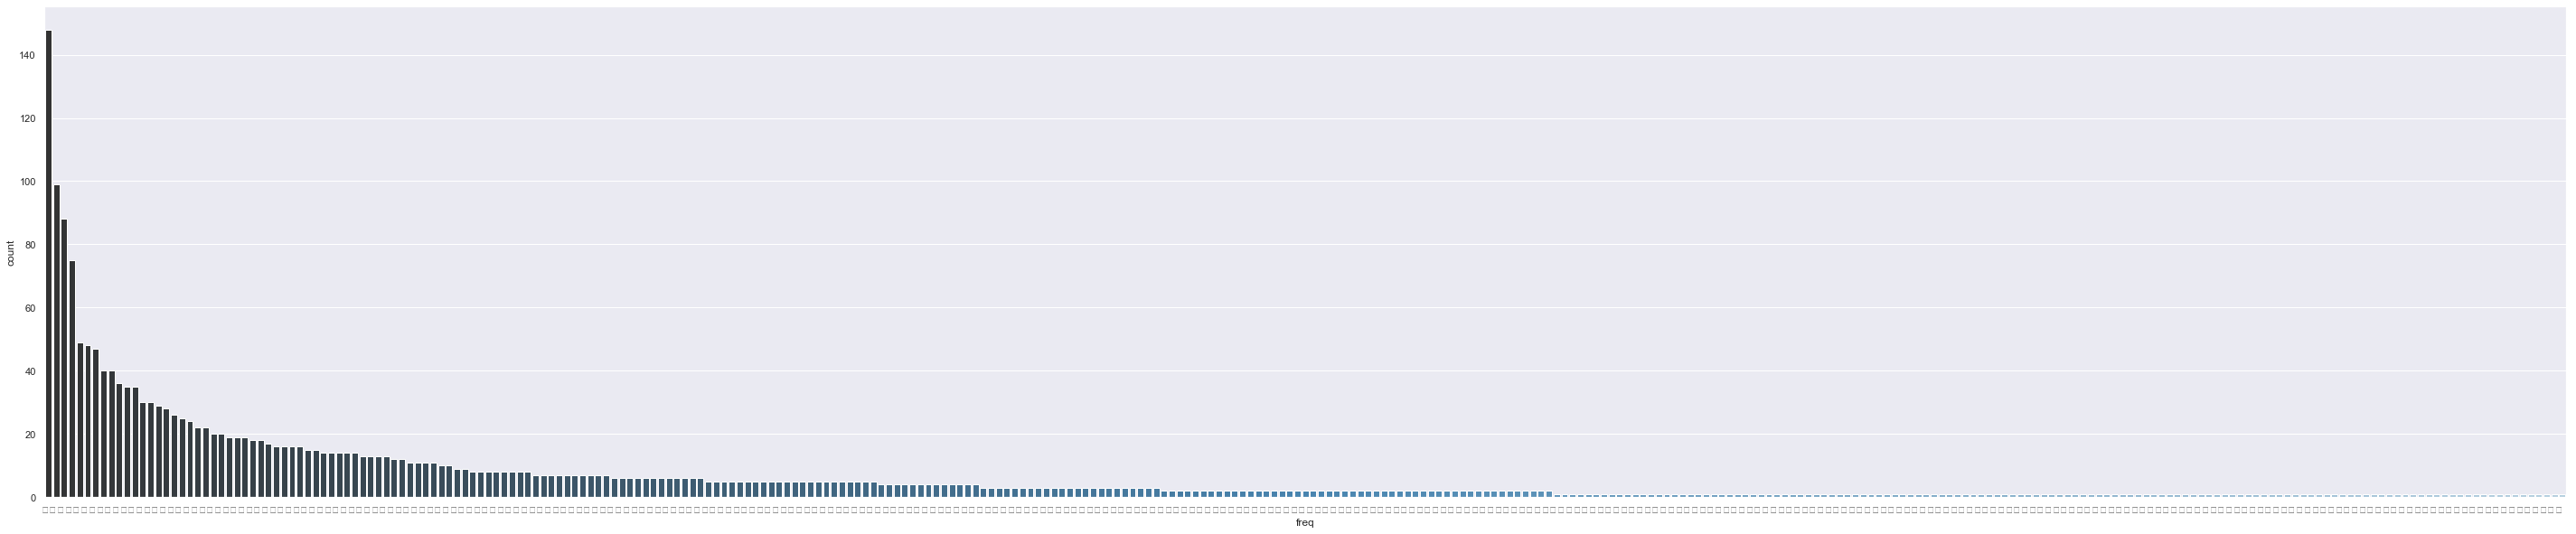

In [126]:
plt.subplots(figsize=[50, 10])
ax = sns.countplot(x='freq', data=df, order = df['freq'].value_counts().index, palette="Blues_d")